# NLP

A lo largo del notebook vamos a trabajar con el siguiente dataset:

https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/

En esa competencia de Kaggle también puedes encontrar Notebooks (*kernels*) sumamente interesantes.

El objetivo es que se familiaricen con algunas herramientas típicas del Procesamiento del Lenguaje Natural (NLP por sus siglas en inglés).La biblioteca fundamental que vamos a usar es NLTK. Probablemente tengas que instalarla. Para ello, googlea cómo instalar esta librería con Conda (no olvides activar el ambiente).

Ten en cuenta que la mayoría de las herramientas de NLP pueden ser consideradas como parte del preprocesamiento, llevar el texto a una forma que la computadora pueda entender. En general, esto corresponde a una forma tipo "tabla" al estilo de los DataFrames de Pandas. Es fácil olvidarse de ese objetivo y perderse en todos los pasos. Al principio es común marearse, pero no te preocupes que verás que no es difícil.


## 1. Carga de datos

Lo primero que tienes que hacer es fijarse en qué formato están los datos. ¿De qué se trata es formato?¿Cómo se abre? Si googleas, vas a ver que hay muchas formas de abrir archivos JSON con Python. Como venimos trabajando con Pandas, googlea "Open JSON with Pandas". Prueben esa función. Si les tira un error en el primer intento, googleen el error. Les aseguramos que la respuesta está muy a mano y es muy accesible, no tienen que hacer nada raro.

In [5]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dataset = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Sarcasm_Headlines_Dataset.json', lines=True)
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


¿Qué forma tiene el dataset?¿Cuántas instancias?¿Cuáles son sus columnas?¿Cuántos titulares hay de cada tipo?¿Podemos hablar ya de *features*?

In [8]:
dataset.iloc[0]


article_link    https://www.huffingtonpost.com/entry/versace-b...
headline        former versace store clerk sues over secret 'b...
is_sarcastic                                                    0
Name: 0, dtype: object

In [9]:
dataset.shape

(26709, 3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


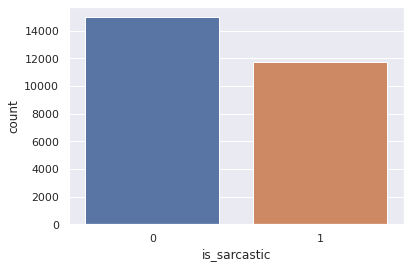

In [10]:
sns.countplot(dataset['is_sarcastic'])
plt.show()
#tiene un buen balance el dataset.

## 2. Breve exploración del dataset

Elige una instancia del dataset al azar y selecciona el *headline*.

In [11]:
index_random = np.random.randint(1,high=dataset.shape[0])
titular = dataset.iloc[index_random].headline
print(index_random, titular)

26694 breaking: 'the onion' in kill range of boston bomber suspect


¿Te parece que es sarcástico?¿Qué características del texto te hace creer - o no - eso? Comprueba si es sarcástico o no imprimiendo en la celda de abajo el valor correspondiente del dataset. (Como la mayoría de los titulares están en inglés y encima refieren a política local, no te preocupes si es una tarea difícil).

In [12]:
print(index_random, dataset.is_sarcastic[index_random])

print(index_random, dataset.iloc[index_random].is_sarcastic)

26694 1
26694 1


## 3. NLTK

Si es difícil para algunos humanos detectar el sarcasmo, probablemente también lo sea para una computadora. De todas formas, se puede hacer el intento. Para ello, es necesario extraer características de cada texto que nos sirvan para ir apuntando al objetivo. En los videos de Acámica hay muchos ejemplo de herramientas para aplicar. Elegir un titular que les llame la atención y probar las siguientes herramientas:

### Tokenización

¿Qué es y para qué sirve?¿Cuáles de todas las formas de tokenización presentadas te parece más útil para este problema?

1. `sent_tokenize`

In [13]:
#nltk.download() #para bajar modulos de la libreria 

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize
titular_st = nltk.sent_tokenize(titular)
titular_st

["breaking: 'the onion' in kill range of boston bomber suspect"]

2. `word_tokenize`

In [15]:
#previo a tokenizar paso a minuscula
titular_wt = nltk.word_tokenize(titular.lower())
titular_wt

['breaking',
 ':',
 "'the",
 'onion',
 "'",
 'in',
 'kill',
 'range',
 'of',
 'boston',
 'bomber',
 'suspect']

### Normalización

¿Qué es y para qué sirve? Notar que varias formas de normalización ya vienen aplicadas en el dataset.

1. Stopwords

Importar los `stopwords` del inglés e imprimirlos.

In [16]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopwords = [palabra for palabra in stopwords if 'not' not in palabra]

stopwords


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

¿Les parece conveniente aplicar todos los stopwords que aparecen en esa lista?

Eliminar del titular elegido los stopwords.

In [17]:
stopwords = set(nltk.corpus.stopwords.words('english'))
wordtokens = titular_wt

titular_wt_sin_sw =  [w for w in wordtokens if not w in stopwords]
#titular_wt_sin_sw = [word for word in titular_wt if word not in stopwords]

titular_wt_sin_sw



['breaking',
 ':',
 "'the",
 'onion',
 "'",
 'kill',
 'range',
 'boston',
 'bomber',
 'suspect']

¿Cuál o cuáles palabras se fueron?

ver clase

### Frecuencia de palabras

Dado el titular ya tokenizado por palabras y sin stopwords, usar `nltk` para extrar la frecuencia con que aparece cada palabras. ¿Tiene sentido esto para titulares?

In [18]:
freq = nltk.FreqDist(titular_wt)
freq.most_common(50)

[('breaking', 1),
 (':', 1),
 ("'the", 1),
 ('onion', 1),
 ("'", 1),
 ('in', 1),
 ('kill', 1),
 ('range', 1),
 ('of', 1),
 ('boston', 1),
 ('bomber', 1),
 ('suspect', 1)]

### Dataset Completo

Antes de pasar a extraer features de cada instancia del Dataset, podemos hacer un pequeño análisis del dataset en su conjunto. Por ejemplo, una opción es agrupar todos los titulares por tipo y extraer de cada clase las palabras más frecuentes. Para ello:

1. Agrupar los titulares por tipo. Crear un dataframe para cada uno. Recuerden usar máscaras.
2. Crear una lista vacia y agregar en esa lista todos los titulares (por tipo/dataframe creado) ya tokenizados (usar el `RegexpTokenizer`) y filtrado por `stopwords`.
3. Usar el `FreqDist` en esa lista que acaban de llenar. Llevar lo que devuelve `FreqDist` a un Dataframe. Ordenar por frecuencia en que aparece cada palabra.
4. Hacer un `barplot` o similar para visualizar.
5. ¿Qué palabras filtrarían, aparte de las que aparecen en `stopwords`? Crear una lista vacía y agregarlas a mano. Agregar en el código que realizaron una línea (similar a la que usan con `stopwords`) para que también filtre por esas palabras.
6. Volver a visualizar.

#### No-Sarcasmo

In [19]:
#aveces en las noticias aparecen titulares que comienzan con New. entonces lo filtro
filtrar = []
if False:
    filtrar.append("u")
    filtrar.append("new")

In [20]:
dataset_no_sarcasmo = dataset[dataset['is_sarcastic']==0]
#dataset_no_sarcasmo = dataset[dataset.is_sarcastic==0]
dataset_no_sarcasmo.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0


In [21]:
import re
stopwords = set(nltk.corpus.stopwords.words('english'))


todos_titulares_no_sarcasmo = []

for i in range(dataset_no_sarcasmo.shape[0]):
    titular = dataset_no_sarcasmo.iloc[i].headline #seleccionar el titular
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular) # Tokenizar con RegexpTokenizer
    titular = [w for w in titular if not w in stopwords] # Filtrar por stopwords
    #   titular = [word for word in titular if word not in stopwords]
    #   titular = [word for word in titular if word not in filtrar]
    todos_titulares_no_sarcasmo.append(titular) #agregar el resultado a la lista



In [22]:
# Esta celda convierte una lista de listas en una unica lista
todos_titulares_no_sarcasmo = list(itertools.chain(*todos_titulares_no_sarcasmo))
todos_titulares_no_sarcasmo[0:10]

['former',
 'versace',
 'store',
 'clerk',
 'sues',
 'secret',
 'black',
 'code',
 'minority',
 'shoppers']

In [23]:
#FreqDist
freq_no_sarcasmo = nltk.FreqDist(todos_titulares_no_sarcasmo)

freq_no_sarcasmo.most_common(50)

[('trump', 1446),
 ('new', 680),
 ('donald', 458),
 ('says', 349),
 ('women', 317),
 ('one', 268),
 ('u', 263),
 ('year', 244),
 ('first', 242),
 ('world', 241),
 ('man', 241),
 ('people', 241),
 ('obama', 235),
 ('day', 226),
 ('make', 217),
 ('gop', 215),
 ('like', 213),
 ('5', 212),
 ('black', 208),
 ('get', 207),
 ('life', 203),
 ('clinton', 203),
 ('white', 189),
 ('house', 188),
 ('time', 187),
 ('could', 186),
 ('watch', 186),
 ('america', 183),
 ('police', 176),
 ('need', 174),
 ('hillary', 171),
 ('president', 170),
 ('bill', 170),
 ('health', 165),
 ('best', 165),
 ('love', 164),
 ('woman', 162),
 ('video', 161),
 ('things', 158),
 ('know', 158),
 ('10', 152),
 ('say', 151),
 ('way', 148),
 ('may', 148),
 ('show', 146),
 ('kids', 145),
 ('american', 143),
 ('back', 139),
 ('change', 138),
 ('years', 137)]

In [24]:
# googlear: how to get pandas dataframe from freqdist
df_no_sarcasmo = pd.DataFrame(list(freq_no_sarcasmo.items()), columns = ["Word","Frequency"])
df_no_sarcasmo.head()

,Word,Frequency
0,former,82
1,versace,1
2,store,14
3,clerk,5
4,sues,15


In [25]:
# ordenar por frecuencia
df_no_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)
df_no_sarcasmo.head()

,Word,Frequency
46,trump,1446
671,new,680
229,donald,458
421,says,349
29,women,317


In [26]:
df_no_sarcasmo.reset_index(drop = True, inplace=True)
df_no_sarcasmo.head()

,Word,Frequency
0,trump,1446
1,new,680
2,donald,458
3,says,349
4,women,317


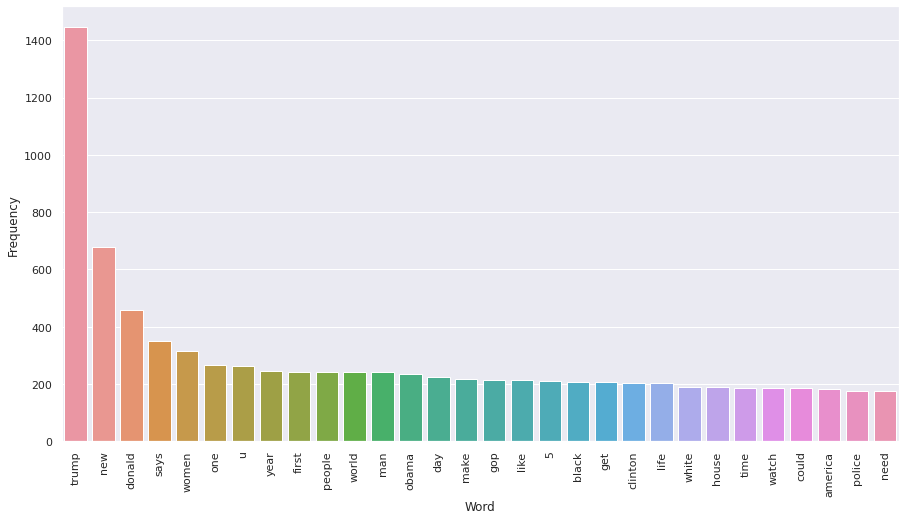

In [27]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_no_sarcasmo.iloc[:30].Word, y = df_no_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()
#aparece new y u por eso hacer el filtro inicial

#### Sarcasmo

In [28]:
dataset_sarcasmo =  dataset[dataset['is_sarcastic']==1]

dataset_sarcasmo.head()

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
15,https://entertainment.theonion.com/nuclear-bom...,nuclear bomb detonates during rehearsal for 's...,1
16,https://www.theonion.com/cosby-lawyer-asks-why...,cosby lawyer asks why accusers didn't come for...,1


In [29]:

stopwords = set(nltk.corpus.stopwords.words('english'))


todos_titulares_sarcasmo = []

for i in range(dataset_sarcasmo.shape[0]):
    titular = dataset_sarcasmo.iloc[i].headline #seleccionar el titular
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular) # Tokenizar con RegexpTokenizer
    titular = [w for w in titular if not w in stopwords] # Filtrar por stopwords
    #titular = [word for word in titular if word not in stopwords]
    #titular = [word for word in titular if word not in filtrar]
    todos_titulares_sarcasmo.append(titular) #agregar el resultado a la lista

# Esta celda convierte una lista de listas en una unica lista
todos_titulares_sarcasmo = list(itertools.chain(*todos_titulares_sarcasmo))
todos_titulares_sarcasmo[0:10]


['mom',
 'starting',
 'fear',
 'son',
 'web',
 'series',
 'closest',
 'thing',
 'grandchild',
 'boehner']

In [30]:
#FreqDist
freq_sarcasmo = nltk.FreqDist(todos_titulares_sarcasmo)

freq_sarcasmo.most_common(50)


[('man', 1154),
 ('new', 843),
 ('area', 480),
 ('report', 426),
 ('nation', 339),
 ('woman', 319),
 ('year', 308),
 ('one', 273),
 ('old', 267),
 ('time', 252),
 ('day', 245),
 ('trump', 238),
 ('study', 213),
 ('still', 212),
 ('u', 207),
 ('like', 194),
 ('first', 193),
 ('get', 190),
 ('back', 189),
 ('family', 186),
 ('obama', 185),
 ('life', 176),
 ('americans', 174),
 ('finds', 173),
 ('house', 168),
 ('people', 158),
 ('last', 157),
 ('going', 151),
 ('local', 145),
 ('world', 142),
 ('white', 140),
 ('clinton', 134),
 ('would', 131),
 ('child', 131),
 ('guy', 129),
 ('self', 128),
 ('school', 128),
 ('little', 127),
 ('good', 126),
 ('000', 123),
 ('home', 123),
 ('way', 120),
 ('every', 119),
 ('parents', 118),
 ('mom', 117),
 ('party', 117),
 ('bush', 116),
 ('make', 116),
 ('work', 112),
 ('3', 112)]

In [31]:

df_sarcasmo = pd.DataFrame(list(freq_sarcasmo.items()), columns = ["Word","Frequency"])
df_sarcasmo.head()

# ordenar por frecuencia
df_sarcasmo.sort_values('Frequency',ascending=False, inplace = True)

df_sarcasmo.reset_index(drop = True, inplace=True)
df_sarcasmo.head()

,Word,Frequency
0,man,1154
1,new,843
2,area,480
3,report,426
4,nation,339


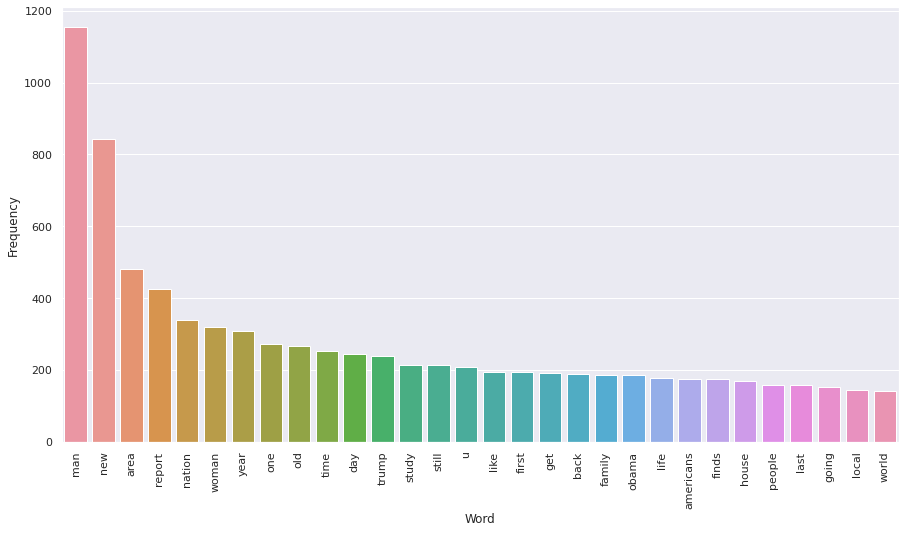

In [32]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_sarcasmo.iloc[:30].Word, y = df_sarcasmo.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## 4. Stemming
Por razones gramaticales muchas palabras pueden escribirse de manera distinta (debido a conjugación, género, número) pero tener el mismo significado para el texto. Por ejemplo si decimos "jugar", "jugando" o "juega", debido a como estan conjugadas, la computadora puede tratarlas como palabras distintas. Pero, en términos de significado, todas estan relacionadas al verbo Jugar. Muchas veces nos va a convenir unir todas estos términos en uno solo.

Una de las manera de hacer esto es por "STEMMING". El Stemming es un proceso eurístico que recorta la terminación de las palabras, agrupándolas por su raiz. Reduzcamos la cantidad de palabras diferentes en nuestro dataset utilizando este proceso.

a. Importar nuevamente el dataset completo

In [33]:
dataset = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Sarcasm_Headlines_Dataset.json', lines=True)
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


b. Tomar del `dataset` solo las columnas de interes

In [34]:
dataset=pd.concat([dataset.headline,dataset.is_sarcastic],axis=1)
dataset.dropna(axis=0,inplace=True)  # Si hay alguna nan, tiramos esa instancia
dataset.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


c. Antes de realizar el proceso de Stemming, vamos a normalizar el texto de la manera que ya estuvimos viendo. Le agregamos en este caso el uso de la libreria `re`, que nos permite sacar del texto todos los caracteres que no sean palabras. Notemos que hay veces que no conviene quitar estos caracteres ya que, por ejemplo, no podremos distiguir preguntas (?) o exclamaciones (!).

In [35]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopword.remove('no')
#stopword.remove('not')

In [36]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
titular_list=[]
for titular in dataset.headline:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras del titular
    titular=nltk.word_tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # Por ultimo volvemos a unir el titular
    titular = " ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    titular_list.append(titular)
    #dataset["titular_normalizado"] = titular_list

d. Agregamos al dataset una columna llamado `titular_stem` que contenga los titulares stemmizados

In [37]:
dataset["titular_stem"] =  titular_list
dataset.tail()

,headline,is_sarcastic,titular_stem
26704,american politics in moral free-fall,0,american polit moral free fall
26705,america's best 20 hikes,0,america best hike
26706,reparations and obama,0,repar obama
26707,israeli ban targeting boycott supporters raise...,0,isra target boycott support rais alarm abroad
26708,gourmet gifts for the foodie 2014,0,gourmet gift foodi


e. Armamos un nuevo dataset llamado `dataset_stem` que contenga solo las columnas `titular_stem` e `is_sarcastic`

In [38]:
dataset_stem=pd.concat([dataset.titular_stem,dataset.is_sarcastic],axis=1)
dataset_stem.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_stem.head()

,titular_stem,is_sarcastic
0,former versac store clerk sue secret black cod...,0
1,roseann reviv catch thorni polit mood better wors,0
2,start fear seri closest thing grandchild,1
3,boehner want wife listen come altern debt redu...,1
4,rowl wish snape happi birthday magic,0


## 5. Lemmatization

Otra manera de llevar distintas palabras a un raíz común en la que comparten un significado es mediante el procezo de 'Lemmatizar' el texto. Es similar al 'Stemming' pero un poco más educado, ya que intenta realizar el proceso teniendo en cuenta cuál es el rol que la palabra cumple en el texto. Esto quiere decir que su accionar será distinto si la palabra a lemmantizar está actuando como verbo, sustantivo, etc. 

Para usar las funciones que ofrece `nltk` para lemmantizar, tendremos primero que descargar la libreria `Wordnet` que se encuentra en la solapa 'corpora' y las librerias 'maxent_treebank_pos_' y 'averaged_perceptron_tagger' que se encuentra en la solapa 'Models'. Para eso ejecute la siguiente celda:

In [39]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [40]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

Veamos cómo actúa el lemmatizer sobre una frase de ejemplo.

In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
# Oracion que usaremos como ejemplo
frase = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

# Hay que regularizar el texto. Dejar solo letra, pasar a minúsculas y tokenizar:

# Sacamos todo lo que no sean letras
frase = re.sub("[^a-zA-Z]"," ",str(frase))
# Pasamos a minúsculas
frase = frase.lower()
# Tokenizamos
frase_tokens = nltk.word_tokenize(frase)


# Veamos como cambians las palabras al lemmatizar
print("{0:20}{1:20}".format("Word","Lemma"))
for palabra in frase_tokens:
    print ("{0:20}{1:20}".format(palabra,wordnet_lemmatizer.lemmatize(palabra)))

Word                Lemma               
he                  he                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
he                  he                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
sun                 sun                 


¿Te sorprende lo que paso? No cambiaron casi nada (solo se fueron las "s" del final). El problema es que precisamos darle información extra al Lemmatizer, decirle qué rol está cumpliendo la palabra en la oración. Si se fijan en la documentación, esto se hace pasandole un argumento extra a la función llamado POS (Part Of Speech).

Hay distintos metodos que intentan averiguar el rol que cumple una palabra en una oración. Nosotros vamos a utilizar uno que viene incorporado en NLTK llamado pos_tag.

In [43]:
print(nltk.pos_tag(frase_tokens))

[('he', 'PRP'), ('was', 'VBD'), ('running', 'VBG'), ('and', 'CC'), ('eating', 'VBG'), ('at', 'IN'), ('same', 'JJ'), ('time', 'NN'), ('he', 'PRP'), ('has', 'VBZ'), ('bad', 'JJ'), ('habit', 'NN'), ('of', 'IN'), ('swimming', 'NN'), ('after', 'IN'), ('playing', 'VBG'), ('long', 'JJ'), ('hours', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('sun', 'NN')]


Las etiquetas refieren al tipo de palabra. Vamos a definir una función para traducir estas etiquetas a los valores de POS que entiende `wordnet_lemmatizer`.

In [44]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, #adjetivo
                "N": wordnet.NOUN, #sustantivo
                "V": wordnet.VERB, #verbo
                "R": wordnet.ADV} #advervio

    return tag_dict.get(tag, wordnet.NOUN)

Veamos finalmente como funciona en nuestro ejemplo.

In [45]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [46]:
frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(frase)]
tipo_palabra = [get_wordnet_pos(w) for w in nltk.word_tokenize(frase)]

# Veamos como cambiaron las palabras
print("{0:20}{1:20}{2:20}".format("Palabra:","Tipo:","Lemma:"))
for i in range(len(frase_tokens)):
    print ("{0:20}{1:20}{2:20}".format(frase_tokens[i],tipo_palabra[i],frase_lemma[i]))

Palabra:            Tipo:               Lemma:              
he                  n                   he                  
was                 v                   be                  
running             v                   run                 
and                 n                   and                 
eating              v                   eat                 
at                  n                   at                  
same                a                   same                
time                n                   time                
he                  n                   he                  
has                 v                   have                
bad                 a                   bad                 
habit               n                   habit               
of                  n                   of                  
swimming            v                   swim                
after               n                   after               
playing             v   

a. Ahora te toca aplicar todo esto a nuestro dataset. Vamos a volver a importarlo y hacer un procedimiento análogo al que hicimos para la parte de Stemming.

In [47]:
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplzar caracteres
import re

dataset = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Sarcasm_Headlines_Dataset.json', lines= True)
dataset = pd.concat([dataset.headline,dataset.is_sarcastic],axis=1)
dataset.dropna(axis=0,inplace=True)

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopword.remove('no')
#stopword.remove('not')

In [48]:
titular_list=[]
for titular in dataset.headline:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    frase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in titular]
    
    
    # Eliminamos las palabras d emenos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    #dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [49]:
dataset["titular_lemm"] = titular_list
dataset.tail()

,headline,is_sarcastic,titular_lemm
26704,american politics in moral free-fall,0,american politics moral free fall
26705,america's best 20 hikes,0,america best hikes
26706,reparations and obama,0,reparations obama
26707,israeli ban targeting boycott supporters raise...,0,israeli targeting boycott supporters raises al...
26708,gourmet gifts for the foodie 2014,0,gourmet gifts foodie


b. Por último nos armamos un nuevo datasate llamado `dataset_lem` que tenga solo las columnas `titular_lemm` y `is_sarcastic`.

In [50]:
dataset_lemm = pd.concat([dataset.titular_lemm,dataset.is_sarcastic],axis=1)
dataset_lemm.dropna(axis=0,inplace=True)  # Por si quedaron titulares vacios
dataset_lemm.head()

,titular_lemm,is_sarcastic
0,former versace store clerk sues secret black c...,0
1,roseanne revival catches thorny political mood...,0
2,starting fear series closest thing grandchild,1
3,boehner wants wife listen come alternative deb...,1
4,rowling wishes snape happy birthday magical,0


**Para mirar**: toma algunos titulares al azar y compara su versión `dataset_lemm` y en `dataset_stem`. Explica.

## 6. Vectorizar

Hasta ahora, tenemos un grupo de palabras por cada titular (bag of words), ya sea *lemmatizado* o *stemmizado*. ¿Te parece que esto servirá para entrenar modelos? La idea ahora es representar esta lista de palabras como un vector. Para esto vamos a utilizar la función `CountVectorizer` de Scikit-Learn. Esta función nos permite representar cada título por un vector con un `1` en las palabras que contiene y un `0` en las que no. Además, vamos a trabajar únicamente con las palabras que aparecen más veces en el texto, ya que las que aparecen una única vez o pocas veces no nos van a brindar información que se pueda generalizar.

a. Tomamos la lista de palabras y el vector que nos dice si es o no sarcástico el título

In [51]:
# Tomamso la lista de palabras y el vector que nos dice si es o no sarcastico el titulo
list_titulos = list(dataset_lemm['titular_lemm'].values)
is_sarc = dataset_lemm['is_sarcastic'].values

## Para probar con Stemmizer:
#list_titulos = list(dataset_stem'titular_stem'].values)
#is_sarc = dataset_stem['is_sarcastic'].values

b. Preparamos el conversor de bag of words a vectores que traemos de sklearn. `CountVectorizer` posee varias funcionalidades que pueden determinarse a partir de parámetros. Les recomendamos fuertemente leer su documentación.

In [52]:
#backofwords con el countvectorizer, cada palabra es una columna y le pongo una columna

from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
#aca le pongo los ngramas
cou_vec=CountVectorizer(max_features=max_features,ngram_range=(2, 2)) # stop_words="english" , ngram_range=(1, 2)


#ngram_range=(1, 2) -->a todo el corpus (el texto) saqueme los uni y bi gramas 
#va en forma de tupla (min, max) para un solo grama (n,n) sino varios ngramas (n,m)

Notemos que desde `CountVectorizer` se pueden quitar las stopwords (algo que ya hicimos con `nltk`) e incluir los n_gramas automáticamente.

c. Ahora sí, vamos generarnos los vectores para cada título a partir del corpus total.

In [53]:
matriz_titulos = cou_vec.fit_transform(list_titulos)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abuse allegations', 'acceptance speech', 'across country', 'acting like', 'adam levine', 'affordable care', 'alec baldwin', 'alex jones', 'already tell', 'alton sterling', 'america best', 'america ferrera', 'american airlines', 'american dream', 'american horror', 'american people', 'americans believe', 'americans know', 'americans still', 'americans want', 'americans would', 'anderson cooper', 'angela merkel', 'angelina jolie', 'anne frank', 'anne hathaway', 'announce plans', 'announces plan', 'announces plans', 'anti abortion', 'anti immigrant', 'anti lgbt', 'anti lgbtq', 'anti muslim', 'anti semitism', 'anti trump', 'antonin scalia', 'apple watch', 'archaeologists discover', 'area family', 'area idea', 'area mother', 'area woman', 'area year', 'ariana grande', 'arianna huffington', 'around world', 'asian american', 'assault allegations', 'astronomers discover']


In [54]:
matriz_titulos.toarray() #devuelve una matriz esparza
matriz_titulos.shape


(26709, 1000)

In [55]:
bow=pd.DataFrame(matriz_titulos.toarray(),columns=cou_vec.get_feature_names())
bow.head()

,abuse allegations,acceptance speech,across country,acting like,adam levine,affordable care,alec baldwin,alex jones,already tell,alton sterling,america best,america ferrera,american airlines,american dream,american horror,...,would rather,year girl,year olds,year resolution,year says,year still,year woman,years away,years later,years life,years prison,york city,york fashion,york times,young women
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
#ver lo que hizo en clase

## 7. Modelar

Ahora sí estamos listos para usar todo nuestro conocimiento de modelos en este set de datos. Tengamos en cuenta que, dependiendo el número de palabras (features) que hayamos elegido, los modelos pueden tardar un rato en entrenarse.

a. Primero, como siempre, separamos en test y train.

In [57]:
x = matriz_titulos.toarray()
y = is_sarc

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Tambien definimos una función que nos permite plotear los resultados en una matriz de confusión.

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["No Sarcastico","Sarcastico"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Naive Bayes
a. Empecemos por un simple Naive Bayes para tener un benchmark de referencia para el accuracy.

In [59]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.5293897416697866


b. Veamos cómo queda graficada la matriz de confusión:

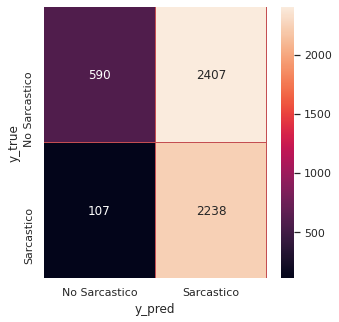

In [60]:
y_pred=nb.predict(xtest)
confusion(ytest,y_pred)

### Random Forest
a. Veamos cómo funciona un random forest para predecir el sarcasmo de una nota en base a su titular.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.6007113440658929


b. Grafiquen su matriz de confusión:

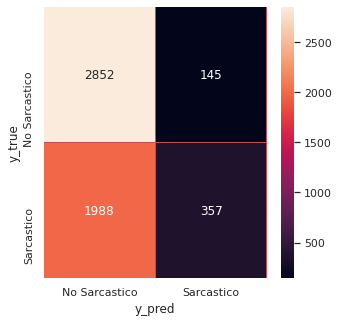

In [62]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

c. Habíamos dicho que algo muy bueno de Random Forest era poder preguntarle por la importancia de los features que uso para clasificar. Veamos en este caso cuales son las palabras que mayormente determinan el sarcasmo de una nota para este clasificador.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


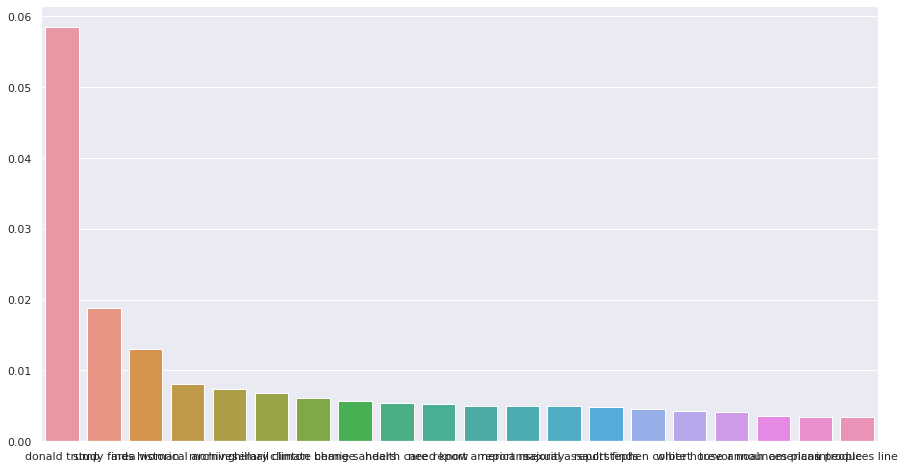

In [63]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = cou_vec.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

### SVM
Por último vamos a utilizar uno de los modelos mas prometedores para este tipo de datos donde el numero de features es comparable al número de instancias: SVM.

a. Entrene un modelo de SVM Lineal y calcule su accuracy para C = 1.

In [64]:
# Notar que en vez de utilizar SVC, vamos a usar LinearSVC. 
# Para el Kernel Lineal, esta función es MUCHO mas rapida que la tradicional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.6052040434294271

b. Grafiquen su matrz de confusión:

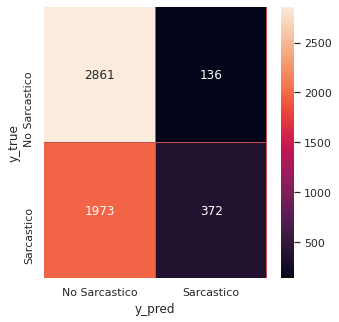

In [65]:
y_pred=svc.predict(xtest)
confusion(ytest,y_pred)

## 7. Explora las posibilidades

Si llegaste hasta acá, ya cuentas con todas las herramientas para poder explorar qué sucede con el poder predictivo cuando van cambiando la manera en que procesas y vectorizas el texto. Algunas sugerencias para explorar son las siguientes:

1. Prueba con Stemmizar en vez de lemmantizar
1. Cambia el numero de features que esta tomando.
1. Prueba con TF-IDF.
1. Incluye los 2-gramas. ¿Qué era eso?
1. Conserve los signos de exclamación y pregunta del texto.


In [66]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer

pd.options.display.max_columns = 30
%matplotlib inline




In [67]:


from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming_tokenizer(str_input): 
    #normalizo el texto, con expresiones rgulares todo lo que sea alfanumerico, lo ponga e vacio y tokenizar en unigrama (split)
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    #uso el steemer de porter
    words = [porter_stemmer.stem(word) for word in words]
    return words




In [68]:

todos_titulares_no_sarcasmo



count_vectorizer = CountVectorizer(stop_words='english', tokenizer=stemming_tokenizer)
X = count_vectorizer.fit_transform(todos_titulares_no_sarcasmo)
print(count_vectorizer.get_feature_names())

pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())




/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

['0', '000', '1', '10', '100', '102', '103', '104', '105', '106', '107', '10th', '11', '110', '113', '113th', '115', '116', '11th', '12', '120', '122', '125', '13', '130', '135', '138', '14', '145', '146', '15', '150', '16', '160', '161', '165', '16th', '17', '175', '1776', '18', '180', '1850', '186', '18th', '19', '1913', '1914', '1915', '1927', '1937', '1939', '194', '1940', '1945', '1960', '1963', '1964', '1967', '1970', '1972', '1980', '1981', '1984', '1988', '1989', '1991', '1992', '1994', '1998', '19th', '1st', '2', '20', '200', '2000', '2003', '2004', '2008', '2009', '200th', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2022', '2024', '2025', '2030', '2032', '2040', '2049', '205', '20th', '21', '21st', '22', '220', '23', '237', '239', '24', '249', '25', '250', '26', '260', '27', '270', '279', '28', '29', '297', '2k16', '2m', '2nd', '3', '30', '300', '301', '30th', '31', '31st', '32', '33', '34', '34th', '35', '350', '350th', '36', '360

,0,000,1,10,100,102,103,104,105,106,107,10th,11,110,113,...,zionist,zip,zippori,zissu,zodiac,zoe,zoetrop,zombi,zone,zoo,zookeep,zooland,zoom,zucker,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer


#en cada palabra revisar los stopword. Puedo pasar una funciona al vectorizador (en tokenizer)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(todos_titulares_no_sarcasmo)
pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())




/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

In [1]:

### IDF

tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(todos_titulares_no_sarcasmo)
df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())
df



NameError: ignored

In [ ]:


# use_idf=True is default, but I'll leave it in
idf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemming_tokenizer, use_idf=True, norm='l1')
X = idf_vectorizer.fit_transform(todos_titulares_no_sarcasmo)
idf_df = pd.DataFrame(X.toarray(), columns=idf_vectorizer.get_feature_names())



idf_df.iloc[:,10:20]



In [ ]:
#ejemplo de contrato de matias
dataset = """
CONTRATO MARCO DE SUBCONTRATACIÓN DE SERVICIOS PROFESIONALES

Este Contrato de Subcontratación de Servicios (“Contrato”) se celebra con fecha  (“Entrada en Vigor”), entre TERADATA ARGENTINA S.R.L. (“Teradata”), cuya oficina principal de negocios se encuentra ubicada en Juan Diaz de Solis 1270, Vicente López, Buenos Aires/Argentina, representada por su representante legal ; y , cuya oficina principal de negocios se encuentra ubicada en , representada por su representante legal, el señor  (“Proveedor”), por la otra, de conformidad a las siguientes cláusulas:

CONSIDERACIONES

(i) TERADATA desarrolla, comercializa y licencia sistemas de tecnología, incluyendo hardware, licencias de software, servicios profesionales de consultoría, entrenamiento, educación, soporte técnico y mantenimiento, todos como parte e integrados a las soluciones que vende a sus clientes; 

(ii) el Proveedor, conoce las características de las soluciones que TERADATA vende a sus clientes y declara y garantiza que tiene las habilidades y las autorizaciones legales necesarias para prestar servicios profesionales respecto a las soluciones de TERADATA, tales como servicios de consultoría, instalación, implantación, desarrollo, etc. (“Servicios”); 

(iii) TERADATA desea aprovechar el conocimiento del Proveedor con respecto a los Servicios, de acuerdo a los términos y condiciones establecidos a la continuación. 

ÁMBITO DE APLICACIÓN

A través de este Contrato, TERADATA podrá, de tiempos en tiempos, buscar la contratación de los Servicios (“Servicios”) del Proveedor, y éste acepta prestar dichos Servicios a favor de TERADATA de acuerdo al presente Contrato. Los Servicios serán prestados por el Proveedor a TERADATA para la atención a la contratación de TERADATA por el “Cliente Final” identificado en el SOW respectivo. 

En cualquier tiempo, TERADATA podrá solicitar al Proveedor la contratación de Servicios. Cada una de las partes manifestará su consentimiento respecto a la contratación de los Servicios, mediante la celebración de “Contratos Particulares”, que pueden consistir en (i) la suscripción de un documento con esa denominación, (ii) en la suscripción de un documento denominado “Statement of Work” (“SOW”) o “Declaración de Trabajo” o (iii) en la aceptación de TERADATA a una Oferta/Propuesta emitida por el Proveedor. Estos documentos serán considerados Contratos Particulares, vinculados y sometidos al presente Contrato Marco (como anexos), con la vigencia que ellos indiquen. Los Contratos Particulares serán independientes unos de los otros, rigiéndose por sus propios términos y condiciones y por los términos y condiciones del presente Contrato Marco. En caso que exista un conflicto entre el presente Contrato y un Contrato Particular o una eventual orden de compra emitida por el Proveedor, prevalecerá el presente Contrato.

1. ALCANCE Y DESCRIPCIÓN DE LOS SERVICIOS

1.1. Cuando sea solicitado por TERADATA, los Servicios del Proveedor podrán comprender la colaboración o asistencia de éste con otros proveedores contratados por TERADATA. El Proveedor suministrará a TERADATA los servicios (“Servicios”) establecidos en los Contratos Particulares – Anexo al presente Contrato, para el cumplimiento de las obligaciones frente al Cliente Final de TERADATA. El presente Contrato y sus anexos no presuponen contrataciones mínimas por parte de Teradata.

1.2. El Proveedor designará a un Gerente quien se reunirá periódicamente con personal de TERADATA para tratar asuntos relacionados con un proyecto, y administrará y dirigirá los recursos del Proveedor que sean solicitados por TERADATA. El Proveedor podrá cambiar a su Gerente en cualquier tiempo, mediante una notificación por escrito a TERADATA con a lo menos 30 días de anticipación a la fecha en que el cambio deba producirse. El nuevo Gerente deberá tener un perfil similar al Gerente reemplazado y contar con la aprobación previa de TERADATA.

1.3. Las Partes dejan expresa constancia que, tanto entre ellas como respecto de terceros, no tienen otra relación que la de contratantes independientes. En consecuencia, este Contrato no crea relaciones de agencia, sociedad o asociación, ni de orden laboral, asimismo, ninguna de las Partes podrá, en forma directa o a través de sus respectivos dependientes o apoderados, asumir, pretender o atribuirse la representación o agencia de la otra; llevar a cabo negocios o celebrar contratos con terceros en nombre de la otra, ni asumir obligaciones por su cuenta propia. Las Partes se comprometen a abstenerse de todo acto que pudiera inducir a errores a terceros al respecto. Las Partes, en su carácter de empresas independientes, tendrán en todo momento la plena responsabilidad de la conducción de sus negocios, como así también del personal a su cargo. Las Partes deberán informarse en forma fehaciente y por escrito, sobre cualquier cambio en la denominación social de las mismas, en su domicilio o en cualquier otro aspecto que se considere relevante o que pueda variar alterar la relación existente entre ellas en la actualidad. Toda referencia a la conducta de las Partes, que se practique en este Contrato incluye la conducta de sus empleados, subcontratistas, o agentes de esa Parte.

1.4. El presente Contrato no otorga exclusividad a ninguna de las Partes, reservándose TERADATA el derecho de designar otros proveedores para los Servicios que necesite contratar; y pudiendo el Proveedor relacionarse con otras empresas de la industria, en tanto cumpla con las obligaciones de confidencialidad descriptas en la cláusula 9. Sin embargo, siempre cuando acepte el suministro de servicios a TERADATA para la atención a un cliente de TERADATA, el Proveedor no podrá trabajar con otras empresas para el suministro de servicios en el mismo cliente. El incumplimiento a la presente disposición, dará derecho a la terminación inmediata del Contrato por parte de TERADATA sin necesidad de notificación previa y al reclamo de las pérdidas, daños y perjuicios que Teradata estime corresponder. 

2. OBLIGACIONES DEL PROVEEDOR

2.1. El Proveedor manifiesta y garantiza a TERADATA que:

(a) Los mejores métodos, habilidades, procedimientos, cuidados y juicios técnicos serán empleados para la prestación de los Servicios descritos en este Contrato; los Servicios serán prestados de la manera más expedita y económica, congruentes con los mejores intereses de TERADATA; y el Proveedor, en todo momento, cooperará con TERADATA a efecto de beneficiar en la mayor medida posible los intereses de TERADATA;

(b) El Proveedor proporcionará Servicios que se apeguen a las especificaciones establecidas en este Contrato;

(c) El Proveedor prestará los Servicios de una manera oportuna, conforme a las coberturas y tiempos establecidos en el Contrato;

(d) Salvo por el material que será suministrado por TERADATA, que: (a) los Servicios y el Producto de los Servicios corresponderá al trabajo original del Proveedor; (b) el Proveedor posee todos los derechos, títulos, autorizaciones legales e intereses relacionados con los Servicios y el Producto de los Servicios, que se requieren para que éste otorgue a TERADATA los derechos y licencias mencionados en este Contrato; (c) los Servicios y el Producto de los Servicios no viola ninguna patente, derecho de autor, marca, secreto industrial o cualquier otro derecho de propiedad y propiedad intelectual de terceros; y (d) cualquier información que el Proveedor divulgue a TERADATA no es confidencial para el Proveedor o cualquier tercero y, en el caso de ser confidencial, el propietario de dicha información haya autorizado su revelación por escrito. 

(e) El Proveedor no tiene obligación o restricción, ni asumirá alguna, que interfiera o implique un conflicto de intereses con los Servicios que proporciona o pueda proporcionar a TERADATA; y

(f) El Proveedor cumplirá con todas las leyes, disposiciones, ordenamientos, decretos administrativos o ejecutivos, reglas y reglamentos aplicables, relacionados con este Contrato y los Servicios y Producto de Servicio proporcionados por el Proveedor.

2.2. El Proveedor mantendrá indemne e indemnizará de cualquier reclamación (incluyendo todos los costos del litigio, honorarios de abogados y honorarios legales): (a) derivada de un incumplimiento o supuesto incumplimiento de cualquiera de los términos mencionados en el Contrato, sus anexos y en especial esta Cláusula 2, (b) derivada del incumplimiento de las obligaciones laborales respecto a sus empleados y/o subcontratados, o (c) por lesiones personales, incluyendo la muerte, y daños a propiedad derivados de u ocasionados por Servicios o Productos de Servicio proporcionados al amparo de este Contrato, en la medida en que tales lesiones o daños sean causados por el Proveedor o cualquiera de sus empleados, agentes o subcontratados, o bien, por cualquier tercero contratado, directa o indirectamente, por el Proveedor o cualquiera de ellos.

2.3. El Proveedor garantiza que utilizará en la prestación de los servicios solamente empleados que tengan comprobadamente pasado por una verificación de su historia profesional, laboral y personal, a través de un proceso formal de verificación de los antecedentes (confirmación de las informaciones y referencias laborales, educacionales, profesionales y personales), esto para garantizar el suministro de los Servicios de acuerdo a los más elevados estándares de la industria de tecnología de la información. Teradata tendrá el derecho de, a cualquier tiempo, solicitar al Proveedor la comprobación de la ejecución del proceso formal de verificación de dichas informaciones. El incumplimiento de esta obligación por el Proveedor será considerado como motivación para la terminación inmediata del Contrato, a la discreción de Teradata, y en la responsabilidad del Proveedor por todas las eventuales pérdidas y daños asociados al incumplimiento de la presente obligación.

2.4. Durante la vigencia del presente Contrato y por 12 meses posteriores a su terminación, el Proveedor no contratará empleados de Teradata que tengan participado de las actividades asociadas al presente Contrato y sus anexos. La violación a la presente disposición podrá, a criterio propio de Teradata, originar la terminación inmediata del presente Contrato y sus anexos, sin perjuicio de la responsabilidad del Proveedor por todas las pérdidas y daños asociadas. No obstante, la aplicación voluntaria e independiente del empleado a los anuncios públicos del Proveedor no será considerada violación de las presentes disposiciones.

2.5. Teradata tendrá el derecho, a cualquier tiempo y bajo sus propios costos, de chequear los documentos, actividades, equipos, libros e informaciones fiscales y contables asociadas a la prestación de los servicios bajo el presente Contrato y sus anexos, con el objetivo de confirmar el cumplimiento de los términos, condiciones y obligaciones del Proveedor establecidas en el presente Contrato y sus anexos. Caso la verificación presente irregularidades, Teradata le informará al Proveedor con respecto a las correcciones que deben ser consideradas y el plazo de aplicación de las mismas. El Bajo pena de terminación del presente Contrato y sus anexos, sin perjuicio de la responsabilidad del Proveedor por las pérdidas y daños asociados, el Proveedor asume el compromiso de aplicar dichas correcciones indicadas por Teradata. La realización de la auditoria no exime ni reduce la responsabilidad del Proveedor por el cumplimiento de sus obligaciones y responsabilidades bajo el presente Contrato y sus anexos.

2.6. El Proveedor deberá garantizar y mantener durante la vigencia del presente Contrato, a su costo, todos los seguros exigidos por la ley así como los demás seguros considerados necesarios y razonables de acuerdo a la industria de tecnología de la información, esto para la adecuada protección tanto del Proveedor como de Teradata con respecto a eventuales incumplimientos, violaciones, daños y perjuicios que sean resultados del suministro de servicios y entregables por parte del Proveedor a Teradata o a los terceros indicados por Teradata, incluyendo pero sin limitación, las pólizas de seguros indicadas a la continuación, con las coberturas establecidas: (i) responsabilidad civil: USD1MM; (ii) Responsabilidad Laboral: USD 1MM; (iii) privacidad y seguridad de red (cyber-risk liability): USD 5MM por incidente, debiendo garantizar la protección a la responsabilidad general, daños punitivos, violación de datos, penalidades y multas regulatorias y danos, perjuicios y costos asociados a eventuales reclamos originados de acciones, dolo, culpa u omisiones de parte del Proveedor, sus empleados y representantes en el suministro de los Servicios. Esta póliza debe incluir cobertura por pérdidas de datos, divulgación do autorizada, acceso o uso no autorizados de los datos y robo de los datos, en cualquier formato; incumplimiento de las obligaciones asociadas a derechos de propiedad intelectual, incluyendo violaciones de patentes y derechos asociados a software, falla en la seguridad de red, ataques a los servicios y transmisión de código malicioso. La cobertura incluirá el costo de notificar a las personas sobre una violación de seguridad o de datos, el costo de los servicios de monitoreo de crédito y cualquier otro gasto de gestión de crisis causalmente relacionado por hasta un (1) año. Además, dicha póliza cubrirá pérdidas, daños y responsabilidades directas e indirectas (por ejemplo, reclamos presentados contra Teradata o sus Afiliados debido a los actos ilícitos y fallas cometidas por el Proveedor, reclamos hechos por Teradata y sus Compañías afiliadas y sus respectivos directores, oficiales, debido a las fallas o actos ilícitos del Proveedor).

3. DERECHOS SOBRE EL PRODUCTO DE LOS SERVICIOS

3.1. El término “Producto de Servicio”, como se usa en este Contrato, se refiere a todos los artículos, incluyendo obras intelectuales, programas computacionales o software, materiales o Servicios, preparados para o entregados a TERADATA por el Proveedor, sus empleados, agentes o subcontratados, durante la vigencia de este Contrato o de otra manera producidos con motivo de lo mismo, así como todos los inventos y descubrimientos que se hicieren durante el desarrollo o preparación de dichos artículos.

3.2. El Proveedor, por su cuenta y por cuenta de sus empleados, agentes y subcontratados, otorga, libera y cede a favor de TERADATA (o favor del Cliente Final de TERADATA, bajo el criterio de TERADATA), todos los derechos, titularidad e intereses, incluyendo la titularidad de los derechos de autor, propiedad intelectual y las patentes, sobre los Productos de Servicio. Los Productos de Servicio creados por el Proveedor, sus empleados, agentes o subcontratados de Servicios, durante la prestación de Servicios a favor de TERADATA al amparo de este Contrato, serán considerados “trabajos solicitados por TERADATA” y propiedad única y exclusiva de TERADATA, sin perjuicio de los derechos irrenunciables que, en su caso, correspondan al inventor conforme a la ley. En la medida en que los Productos de Servicio contengan cualquier material preexistente, el Proveedor otorga a TERADATA (o favor del Cliente Final de TERADATA, bajo el criterio de TERADATA), de manera irrevocable, mundial, no-exclusiva, libre de regalías y de cualquier gravamen, el derecho y licencia para usar, ejecutar, reproducir, realizar, exhibir, distribuir y preparar Servicios derivados de dichos materiales preexistentes, así como autorizar a otros para realizar todos o cualquiera de los actos anteriores. A solicitud de TERADATA, el Proveedor proporcionará a TERADATA la asistencia que ésta pueda requerir, incluyendo cualesquiera documentos, información o materiales que se encuentren en posesión del Proveedor o a su disposición, a efecto de que TERADATA pueda proteger sus derechos, incluyendo patentes y derechos de autor, respecto de cualquier Producto de Servicio. Queda estrictamente prohibido al Proveedor realizar actividades distintas a las expresamente autorizadas por TERADATA. La infracción de lo anterior facultará a TERADATA a poner término inmediato al presente Contrato y ejercitar las acciones civiles y criminales correspondientes por infracción de la Ley de Propiedad Intelectual.

4. APROBACIONES

4.1. Los Servicios y Productos de Servicio del Proveedor, estarán sujetos a la revisión y aceptación de TERADATA y/o del Cliente Final de TERADATA, conforme a los requisitos de este Contrato, la cual no será negada de manera injustificada. El Proveedor, sin cargo alguno a TERADATA, corregirá todas las deficiencias que sean encontradas durante dicha revisión. Cualquier reclamación que TERADATA pudiere tener al amparo de este Contrato, sobrevivirá a dicha revisión, aceptación y pago pudiendo exigir al Proveedor las correcciones necesarias. El procedimiento que se empleará para la aceptación a rechazo será el siguiente:

Una vez que el Proveedor haya concluido la ejecución de los Servicios encomendados, lo comunicará por escrito a Teradata, quien deberá aceptarlos o rechazarlos dentro de los 15 días hábiles siguientes a la fecha de recepción de dicha comunicación. En caso de ser rechazados total o parcialmente los Servicios prestados, los defectos y problemas detectados deberán subsanarse dentro del plazo que fije TERADATA, siguiéndose luego el mismo procedimiento señalado en esta cláusula, hasta que se verifique la recepción conforme. 

4.2. El rechazo de los Servicios podrá dar lugar a la aplicación de multas según lo pactado. El rechazo de los Servicios facultará a TERADATA a dar por terminado este Contrato conforme a lo dispuesto en la Cláusula 7.2.

5. RESPONSABILIDAD LIMITADA - En ningún caso TERADATA será responsable frente al Proveedor por los daños indirectos, consecuenciales, lucro cesante, daños morales, daños punitivos, incluso si hubiere sido informado de su posible ocurrencia. salvo por las reclamaciones del Proveedor por lesiones corporales o daños a bienes materiales, respecto de los cuales TERADATA pueda ser responsable, en ningún caso la responsabilidad global de TERADATA frente al Proveedor, excederá de las cantidades adeudadas al Proveedor por la prestación integral y satisfactoria del Contrato, menos aquellas cantidades, si hubiere, que previamente hayan sido pagadas por TERADATA al amparo de dicho Contrato. esta cláusula 5 contiene la responsabilidad total de TERADATA y los únicos derechos del Proveedor.

5.1. Reciprocidad en las Penalidades – El Proveedor acepta que toda y cualquier penalidad aplicada a Teradata por los Clientes Finales que reciben el Servicio (a quien los Servicios son efectivamente/finalmente suministrados), siempre cuando originadas en el incumplimiento o falla del Proveedor en el desarrollo de las obligaciones establecidas en el presente Contrato y sus anexos, serán responsabilidad del Proveedor. De ser así, el Proveedor asume la responsabilidad en reembolsar a Teradata, dentro de los 5 (cinco) días calendario, el monto de cualquier penalidad pagada por Teradata, con base en las disposiciones de la presente sección. A elección de Teradata el valor debido por el Proveedor con respecto a las penalidades podrá ser compensado con los valores debidos por Teradata al Proveedor. 

6. PAGO

6.1. Teradata pagará al Proveedor por todos los Servicios y Productos de Servicio que sean prestados/entregados al amparo de este Contrato, conforme a lo establecido en el Anexo respectivo.

6.2. El Proveedor se asegurará de que todas las facturas sean enviadas a TERADATA. Salvo por acuerdos distintos establecidos en los anexos, los Servicios serán facturados por el Proveedor en forma mensual y a mes vencido, contra la aceptación de los Servicios por TERADATA y/o el Cliente Final. TERADATA deberá abonar las facturas a los cuarenta y cinco días (45) desde la recepción y aceptación de la factura correspondiente. 

6.2.1. Será condición de pago de las correspondientes facturas la  presentación, por parte del  Proveedor, junto con aquellas, de lo siguiente: (i) constancias de pago de las cargas sociales y de los recibos de sueldo del personal involucrado en los Servicios; (ii) copia de la constancia de pago de las pólizas de seguro exigidas por la ley (seguro de vida, de responsabilidad civil, laboral, seguro de accidentes personales y profesionales) y las indicadas en el numeral 2.6; (iii) copia firmada por el representante legal del Proveedor de los listados emitidos por las Compañías de Seguros. El incumplimiento de tal compromiso implicará la retención por parte de TERADATA de la/s factura/s pendiente/s de pago, hasta tanto el Proveedor cumpla en acompañar las copias de las constancias indicadas. Asimismo, TERADATA podrá rechazar aquellas facturas que presenten inconsistencias o errores, debiendo ser reemplazadas por el Proveedor a la brevedad. En tal caso, el plazo de 45 días antes señalado se contará desde la fecha de presentación de la nueva factura.

6.3. El Proveedor es responsable del pago de los impuestos establecidos a su cargo en las disposiciones fiscales o tributarias aplicables en relación con la prestación de los Servicios y a los Productos de Servicio al amparo de este Contrato, y es el único responsable del pago total y absoluto de todos los gastos involucrados a todos los terceros con los que subcontrate para la provisión de los Servicios y Productos de Servicio que se requieran conforme a este Contrato. En consecuencia, los precios incluyen viáticos y cualesquiera otros gastos en que incurra el Proveedor relacionados con la prestación de los Servicios. Las partes acuerdan que la cantidad aquí establecida será la única y total cantidad que TERADATA pagará al Proveedor por los Servicios objeto de este Contrato, motivo por el cual el  Proveedor no tendrá derecho a solicitar de TERADATA el pago adicional de ninguna cantidad por ningún concepto, incluyendo, intereses o gastos y costos incurridos por el Proveedor en la prestación de tales Servicios.

7. VIGENCIA DEL CONTRATO

7.1. El presente Contrato tendrá inicio a partir de la fecha indicada en su párrafo inaugural y permanecerá en vigor por plazo indeterminado. El presente Contrato continuará en vigor hasta que concluya la prestación de los Servicios amparados por el mismo e indicados en el Contrato Particular correspondiente.

7.2. TERADATA podrá dar por terminado el Contrato sin necesidad de expresar causa notificándolo por escrito al Proveedor con treinta (30) días de anticipación. TERADATA podrá dar por terminado el presente Contrato o cualquier parte del mismo, por incumplimiento de obligaciones del Proveedor, mediante una notificación por escrito a éste con quince (15) días de anticipación. Una vez que el Proveedor reciba dicha notificación y se cumpla el periodo de 15 días sin que haya subsanado el incumplimiento, el Contrato se considerará terminado para todos los efectos y facultará a TERADATA a poner término inmediato al presente Contrato, mediante la simple notificación por escrito al Proveedor. Tratándose de infracción de obligaciones de no hacer, TERADATA podrá poner término inmediato al presente Contrato, mediante una notificación por escrito al Proveedor. En este caso, el Contrato se entenderá terminado al tercer día de despachada la correspondiente notificación. Producida la terminación del Contrato, en cualquier supuesto, la única obligación de TERADATA, y el único derecho del Proveedor, consistirá en pagar a éste, conforme al calendario de pagos descrito en el Contrato los Servicios concluidos pendientes de pago a la fecha de la terminación. TERADATA efectuará dicho pago sólo si acepta los Servicios y cualquier Producto de Servicio relacionado con los mismos. Tratándose de Servicios no aceptados por TERADATA, ésta podrá exigir al Proveedor la restitución, más reajustes e intereses, de lo que haya pagado anticipadamente por ellos.

7.3. El Proveedor podrá dar por terminado el presente Contrato por incumplimiento de TERADATA mediante la notificación por escrito a ésta con treinta (30) días de anticipación. Una vez que TERADATA reciba dicha notificación y se cumpla el periodo de los 30 días sin que haya subsanado el incumplimiento, el Contrato se considerará terminado para todos los efectos, sin que ello de lugar al Proveedor a reclamo de suma alguna en concepto de indemnización. Producida la terminación del Contrato, la única obligación de TERADATA, y el único derecho del Proveedor, consistirá en pagar a éste, conforme al calendario de pagos descrito en el Contrato, los Servicios concluidos pendientes de pago a la fecha de la terminación. TERADATA efectuará dicho pago sólo si acepta los Servicios y cualquier Producto de Servicio relacionado con los mismos.

7.4. El presente Contrato podrá ser terminado por cualquiera de la partes, bastando con una notificación escrita dirigida a la otra con 10 días de anticipación, si se inicia un procedimiento de quiebra o concurso mercantil, cesión de bienes, etc. en contra de alguna de ellas, o en su caso, si cualquiera de las partes cae en estado de insolvencia.
7.5. Los anticipos que hubieren sido pagados por TERADATA al Proveedor que excedan de las cantidades adeudadas al Proveedor de Servicios serán reembolsados por el Proveedor de Servicios a TERADATA, incluyendo reajustes e intereses, por conducto de TERADATA, dentro de los treinta (30) días siguientes a la fecha en surta efectos la terminación. TERADATA también podrá exigir el reembolso de lo que haya pagado anticipadamente por los Servicios que aún no se hayan comenzado a desarrollar.

7.6. Cualquier bien, incluyendo hardware o software, que hubiere sido proporcionado por TERADATA al Proveedor, sin cargo alguno para éste último, deberá ser devuelto inmediatamente, a más tardar en la fecha en que surta efectos la terminación en las mismas condiciones en que recibió los bienes, salvo por el desgaste legítimo y normal sufrido por el uso y transcurso del tiempo.

7.7. Las cláusulas 2, 3, 5, 7, 9, 10, 12.7 y 12.8, 12.9 y 12.11 de este Contrato, sobrevivirán a la terminación o extinción de este Contrato.

8. LUGAR DE PRESTACIÓN DE LOS SERVICIOS - Los Servicios serán prestados desde las dependencias del Proveedor. Si cualquiera de los Servicios debe ser prestado en las instalaciones de TERADATA o del Cliente Final de TERADATA, los empleados, agentes o subcontratados del Proveedor, deberán observar todas las políticas y procedimientos de TERADATA (y del Cliente Final) en materia de seguridad, así como todas las reglas y reglamentos internos de trabajo, incluyendo la observancia de las políticas de confidencialidad de TERADATA y lo dispuesto en la Cláusula 9 de este Contrato.

9. CONFIDENCIALIDAD

9.1. El Proveedor acepta mantener la existencia de este Contrato, incluyendo la naturaleza de los Servicios y de los Productos de Servicio, sus respectivo manuales y documentación de respaldo, que sean proporcionados al amparo de este Contrato, así como toda la información que sea divulgada por TERADATA al Proveedor y los anexos y Contratos Particulares, en absoluta confidencialidad y en carácter permanente, para el beneficio único y exclusivo de TERADATA. En consecuencia, todos los antecedentes que reúna el Proveedor y sus empleados, agentes o subcontratados en el cumplimiento del presente Contrato, sea que provengan de TERADATA o de los clientes que contraten con ella, deberán ser mantenidos por el Proveedor y sus empleados, agentes o subcontratados con carácter absolutamente confidencial, sin que pueda invocarse para justificar una infracción a este respecto, la circunstancia de tratarse de conocimientos de uso general. La obligación de mantener esta reserva es de carácter permanente, y no estará subordinada a la terminación por cualquier causa del presente Contrato. La infracción de las obligaciones señaladas, hará responsable al Proveedor de todos los perjuicios, directos o indirectos, previstos o no que TERADATA pueda experimentar por este motivo. TERADATA tendrá derecho a repetir contra el Proveedor por las indemnizaciones que se vea obligado a entregar a sus clientes por los perjuicios por esta causa ocasionados, con los reajustes e intereses que procedan.

9.2. Todos los productos, equipos, software, firmware, sistemas y materiales de entrenamiento, así como cualquier elemento de propiedad intelectual de TERADATA entregado por TERADATA al Proveedor para contribuir al cumplimiento de sus obligaciones conforme al presente Contrato tienen el carácter de confidenciales y quedan sujetos a las restricciones establecidas en esta Cláusula 9. El Proveedor se obliga a no desensamblar, descompilar o aplicar ingeniería inversa a los elementos antes señalados.

9.3. El Proveedor garantiza que adoptará todas las medidas de seguridad y criptografia exigidas por la ley para el tratamiento de las Informaciones Conficendiales y personales/propietarias a que tendrá acceso en razón de la prestacion de los Servicios, tal cual proporcionará la seguridad de datos y los procedimientos adecuados de backup, todo para garantizar la confidencialidad y privacidad de dichas informaciones, tanto de TERADATA como de los Clientes Finales. 

10. SEGUROS - El Proveedor manifiesta y garantiza que cuenta, y posteriormente mantendrá, a su costo, todos los seguros que sean necesarios conforme a la ley, y aquellos que son necesarios o sean prudentes tener, como por ejemplo seguro de responsabilidad civil, para proteger adecuadamente a TERADATA y a sí mismo de lesiones (incluyendo la muerte) o daños relacionados con o derivados de la prestación de los Servicios y los Productos de Servicio por parte del Proveedor a favor de TERADATA al amparo de este Contrato, incluyendo, sin limitación, responsabilidad general, responsabilidad civil y responsabilidad laboral. El Proveedor se asegurará de que TERADATA sea notificada por escrito, con una anticipación de un mes por lo menos, de cualquier cambio o cancelación de las pólizas de seguro.

11. DESEMPEÑO DEL PROVEEDOR

11.1. TERADATA y el Proveedor acuerdan reunirse periódicamente, a lo menos una vez cada 2 meses, para revisar la ejecución del Contrato y de los Contratos Particulares, incluyendo sin que implique limitación, revisión de costos, calidad de los Servicios, tecnologías, etc. Las reuniones señaladas se llevarán a efecto en las oportunidades y lugares que TERADATA designe.

11.2. Con el objeto de evaluar el desempeño del Proveedor, éste deberá proporcionar mensualmente a TERADATA reportes de desempeño tendientes a medir, evaluar y corregir las deficiencias detectadas en el desempeño del Proveedor.

11.3. Los reportes antes señalados deben ser presentados en el plazo señalado por TERADATA y deben ser fidedignos. En caso contrario, se considerará que el Proveedor no cumple con los procesos tendientes a medir, evaluar y corregir las deficiencias en el desempeño del Proveedor.

11.4. Penalidades por incumplimiento o desempeño irregular podrán aplicarse a criterio de TERADATA, siempre cuando indicadas en los Contratos Particulares.

12. DISPOSICIONES GENERALES

12.1. Notificaciones - Todas las notificaciones realizadas al amparo de este Contrato, serán hechas por escrito y enviadas a la contraparte por correo tradicional. Las notificaciones por correo tradicional deberán realizarse por correo certificado con acuse de recibo. Las notificaciones se entenderán realizadas en el momento de su recepción, y serán dirigidas a TERADATA (para las notificaciones a TERADATA) y al Gerente (para las notificaciones al Proveedor) a los domicilios de cada uno de ellos mencionados en el encabezado de este Contrato. Las partes podrán cambiar sus domicilios mediante una notificación realizada en los términos de esta Cláusula 13.1.

12.2. Modificaciones - Ninguna renuncia, corrección o modificación a las disposiciones de este Contrato, será válida si no se realiza por escrito, en la forma de una modificación haciendo referencia a este Contrato, y se encuentra firmada por los representantes legales de ambas partes. Además, ninguna de las disposiciones contenidas en las órdenes de compra, facturas u otros documentos de cualquiera de las partes, prevalecerán sobre los términos y condiciones de este Contrato.

12.3. La demora no es renuncia - La demora de cualquiera de las partes en ejercer cualquier derecho, facultad o acción al amparo de este Contrato, salvo que se establezca expresamente y por escrito, no será considerada como una renuncia de dichos derechos, facultades o acciones.

12.4. Cesión - El Proveedor no cederá los derechos y obligaciones que emanan del presente Contrato ni podrá subcontratar con terceros las obligaciones bajo su propia responsabilidad, sin la aprobación previa y por escrito de TERADATA. Cualquier acto en contravención de lo anterior será nulo.

12.5. Caso fortuito o fuerza mayor - Ninguna de las partes será responsable por el incumplimiento, parcial, total o tardío, derivado de caso fortuito o fuerza mayor, siempre y cuando no hubieren dado causa o contribuido a él. Dichos actos incluyen, pero no están limitados a, huelgas, paros, alborotos populares, actos de guerra, actos terroristas, epidemias, disposiciones generales gubernamentales, fallas eléctricas, terremotos u otros desastres.

12.6. Divisibilidad - Si se llegare a considerar que cualquier disposición de este Contrato es inválida o ineficaz, se considerarán omitidas en la medida que lo permita la ley, y las disposiciones restantes de éste Contrato continuarán vigentes, debiendo interpretarse en forma que permitan la más fiel ejecución del Contrato en cuestión conforme a la intención que tuvieron en vista las partes al contratar.

12.7. Solución de controversias y legislación aplicable - Cualquier controversia o reclamación entre las partes que surja o no en relación con este Contrato, será resuelta en arbitraje ante un solo árbitro, abogado, conforme al Reglamento del Tribunal de Arbitraje General de la Bolsa de Comercio de Buenos Aires. El laudo arbitral se pronunciará conforme a derecho y será definitivo y obligatorio, y podrá ser presentado para su ejecución ante cualquier tribunal que tenga jurisdicción. El arbitraje se llevará a cabo en Buenos Aires y el idioma será el español. La obligación de resolver las controversias en arbitraje no comprenderá a aquellas por el uso indebido o violación de los derechos de propiedad intelectual de una de las partes. No obstante a lo anterior, cualquiera de las partes podrá acudir a un juez o tribunal a efecto de obtener una resolución que impida o prevenga el uso indebido de sus derechos de propiedad intelectual mientras se realiza la designación de un árbitro y para iniciar procedimientos judiciales ejecutivos de obligaciones. Las leyes de Argentina, Tribunales de Buenos Aires regirán la interpretación y ejecución de este Contrato; sin embargo, el Reglamento de la Corte de Arbitraje de la Cámara de Comercio Internacional regirá las cuestiones del procedimiento de arbitraje. Ninguna de las partes podrá presentar una reclamación después de dos años de que el derecho de presentar dicha reclamación nazca y se haga exigible. El árbitro aplicará los términos acordados en el presente Contrato , y no tendrá facultad alguna de conceder daños punitivos u otros daños no compensatorios o daños en exceso de las limitaciones y excluyentes establecidas en este Contrato o conceder beneficios incongruentes con los términos del Contrato.

12.7.1. Costos – Cada parte tendrá que correr con sus propios gastos de honorarios de abogados y demás costos asociados a la negociación, mediación y arbitraje estipulados en esta Sección, excepto que los costos y gastos de arbitraje, que no sean los honorarios de abogados, sean pagados en conformidad a las normas de la Asociación Estadounidense de Arbitraje. Si se necesita un proceso judicial para aplazar el litigio o forzar el arbitraje, la parte que se oponga sin éxito a dicho proceso deberá pagar todos los costos, gastos y honorarios de abogados asociados y en los que haya incurrido razonablemente la otra parte.

12.8. Registros Contables - Por el término de dos años contados desde el último pago efectuado por TERADATA al Proveedor conforme al presente Contrato, el Proveedor deberá mantener registros contables completos y fidedignos de las operaciones realizadas con TERADATA, conforme a los principios y prácticas contables generalmente aceptadas, que sirvan de sustento a los pagos efectuados por TERADATA y que permitan además verificar el cumplimiento de las obligaciones del Proveedor conforme al presente Contrato y a los Contratos Particulares respectivos. TERADATA tendrá acceso a dichos registros durante horas hábiles.

12.9. Personal del Proveedor

12.9.1. El Proveedor deberá contar con un contrato escrito con cada uno de sus empleados, agentes y subcontratados (conjuntamente designados en este Contrato como “personal”), y deberá cumplir con todos los términos y condiciones legales y con los pactados en esos contratos. Asimismo, Teradata podrá solicitar expresando la causa por escrito que el personal del Proveedor sea desplazado o reemplazado en sus tareas, y el Proveedor deberá cumplir con dicha remoción o reemplazo de manera inmediata, designando a un reemplazo a entera satisfacción de Teradata y se asegurará de que dicho personal no será reasignado para la prestación de Servicios. Por ningún motivo se considerará que el personal del Proveedor es un empleado, agente o Proveedor de TERADATA, y dicho personal, así como el Proveedor, no tendrán derecho a recibir los beneficios otorgados por TERADATA a sus empleados. 

12.9.2. El Proveedor asume la responsabilidad absoluta por los actos de dicho personal y será el único responsable de su supervisión, dirección y control diario. Asimismo, el Proveedor se hace expresamente responsable de que se cumplan debidamente las obligaciones laborales, impositivas y previsionales respecto del personal involucrado en los Servicios, asumiendo la obligación de mantener indemne a TERADATA respecto al cumplimiento y exigencia del cumplimiento del pago de las remuneraciones correspondientes, pago y/o retención de los aportes y contribuciones destinados a los entes y cajas previsionales, cuotas sindicales y de obra social, así como de la obligación de actuar como agente de retención, percepción e información de tributos nacionales, provinciales y municipales, creados o a crearse. El personal involucrado contara con los seguros que cubran los accidentes y enfermedades del trabajo, que pudieran afectar al personal destinado a prestar los Servicios objeto de este Contrato, incluyendo la acción de derecho común. Asimismo, el Proveedor deberá contratar seguro de accidentes personales para el caso de corresponder en virtud del personal contratado. Por ello, el Proveedor se obliga a presentar, ante un requerimiento puntual de TERADATA: i) constancias de pago de las cargas sociales y de los recibos de sueldo del personal; ii) copia de la póliza de seguros y la correspondiente constancia de pago. En caso que el Proveedor no acredite oportunamente el cumplimiento íntegro de las obligaciones laborales y/o de seguridad social en la forma señalada, TERADATA podrá retener los pagos a efectuar al Proveedor hasta que éste cumpla con la obligación aquí dispuesta. 

12.9.3. El Proveedor manifiesta que cuenta con los elementos propios y suficientes conforme a la ley para cumplir las obligaciones que deriven de las relaciones con sus empleados, agentes, proveedores y terceros, y en consecuencia, se obliga frente a TERADATA a asumir la responsabilidad derivada de cualquier reclamación de carácter laboral, de seguridad social, tributario, o de cualquier otra naturaleza respecto de los empleados, agentes, subcontratados, proveedores o terceros que utilice en la ejecución de los Servicios materia de este Contrato. Asimismo, el Proveedor se obliga a indemnizar y a mantener indemne a TERADATA de cualquier demanda o reclamación que pudiesen presentar el personal del Proveedor, incluyendo costos legales y honorarios de abogados.

12.9.4. Si TERADATA fuera demandada en forma directa o subsidiaria por alguna de las personas empleadas por el Proveedor en el desarrollo y ejecución del objeto de este Contrato, o bien recibiera cualquier tipo de reclamo judicial o extrajudicial, ya sea de dichas personas, como así también, entre otros, del Ministerio de Trabajo, entes y cajas previsionales, sindicatos, obra social le asistirán los siguientes derechos:

(i) Exigir al Proveedor que asuma la defensa legal de TERADATA o bien, a su exclusivo criterio, asumirla por sí misma a expensas del Proveedor. El Proveedor deberá reembolsar a TERADATA todos los gastos que dicha defensa implique, incluyendo sin que implique limitación, gastos de abogados, procuradores, receptores, notificaciones, copias, gastos de traslado, estadía, viáticos, condenaciones, indemnizaciones, etc.

(ii) En caso que TERADATA efectúe el pago total o parcial de las cantidades reclamadas por las personas que intervengan en el desarrollo y ejecución del objeto de este Contrato, el Proveedor deberá reembolsar a TERADATA los desembolsos realizados por ésta, dentro de las 24 horas que dichas sumas sean realizadas. Asimismo, TERADATA tendrá derecho, a su elección, de compensar cualquier crédito que tenga por estos conceptos contra el Proveedor con cualquier obligación o deuda hacia la misma, como así también podrá retener de los pagos a efectuar al Proveedor, el monto por de la demanda o reclamo principal o subsidiariamente. Debiendo asimismo el Proveedor abonar las diferencias, si correspondieran, hasta alcanzar las sumas efectivamente abonadas por TERADATA. 

12.9.5. Los reembolsos señalados deberán incluir los reajustes e intereses que procedan desde la fecha en que TERADATA realiza el desembolso hasta el momento de su restitución. El Proveedor acepta desde ya que TERADATA deduzca de los pagos pendientes al Proveedor las cantidades que deban ser reembolsadas por éste.

12.9.6. TERADATA también tendrá derecho a ser reembolsada por el Proveedor, en la misma forma señalada en el párrafo anterior, respecto de cualquier multa de carácter administrativo que le sea impuesta debido a infracción de obligaciones laborales y/o de seguridad social por parte del Proveedor.

12.10. Encabezados - Los títulos y encabezados de las distintas cláusulas de este Contrato, son sólo una referencia y no tienen ninguna otra finalidad, ni la de explicar, modificar o servir como criterio de interpretación de cualquiera de las disposiciones de este Contrato.

12.11. Prácticas Anti-corrupción - Se deja constancia que el personal de Teradata se encuentra sujeto, por lo que hace a su actividad frente a terceros, entre otras, a las normas sobre ética comercial y practicas anticorrupción, especialmente a la ley de prácticas anticorrupción en los Estados Unidos (FCPA) y a las leyes locales sobre la materia. Tales normas éticas implican considerar que no será licito que el Proveedor o cualquier ejecutivo, director, empleado, dependiente, socio o accionista de éste, actuando personalmente o a través de terceros, pague u ofrezca pagar o entregar directa o indirectamente dinero o cualquier cosa de valor a cualquier, ejecutivo, director, representante, empleado, dependiente, socio o accionista de potenciales clientes,  de gobierno u privados, o a cualquier persona que tenga capacidad de influir  en la decisiones de éstos, con el objeto de: (i) Influir en cualquier acto o decisión de aquellas personas para que hagan u omitan realizar un acto que importe apartarse de los intereses de la empresa, institución u organismo de la administración del Estado al que pertenecen, en beneficio de intereses propios o de terceros. (ii) Inducir a tales personas a usar su influencia para afectar en las decisiones que pueda adoptar la empresa, institución u organismo de la administración del Estado, al que pertenecen, en beneficio de intereses propios o de terceros. (iii) Consecuentemente, el Proveedor se obliga a ceñirse también a dichas pautas, en todas las actuaciones que lleve a cabo ante terceros, en el marco del presente Contrato; y libera a Teradata de cualquiera responsabilidad que pudiere generarse o hacerse efectiva por infracción de dichas pautas. Cualquier infracción, aún menor, a dichas pautas, será considerada un incumplimiento gravísimo a las obligaciones del Proveedor, y producirá el término automático e inmediato del presente Contrato, sus anexos y Contratos Particulares, a la vez que facultará a Teradata a reclamar al Proveedor por cualquier perjuicio que se derive para ella de dicha infracción, sea éste directo o indirecto, previsto o no, por daño directo, indirecto, emergente, lucro cesante y/o por daños morales, multas, condenaciones e indemnizaciones.

ACUERDO INTEGRAL - El presente Contrato constituye el acuerdo integral entre TERADATA y el Proveedor sobre los Servicios a ser proporcionados por el Proveedor y prevalece sobre cualquier comunicación, declaración, acuerdo o convenio, verbales o escritos, que hubieren celebrado con anterioridad las partes.

En testimonio de su aceptación, las partes han suscrito cada una de ellas, por conducto de sus respectivos representantes, dos ejemplares del presente Contrato de idéntico tenor y fecha, en vigor a partir de la fecha abajo señalada.

Convenido y Aceptado


TERADATA ARGENTINA S.R.L.






Nombre:

Nombre: 
Posición:

Posición:
Fecha:

Fecha:




Testigos









ID:

ID:


CONTRATO DE SUMINISTRO DE SERVICIOS
ANEXO I
STATEMENT OF WORK – SOW




"""
#las tres " es encerreme todo con string

